In [27]:
import pandas as pd
import cv2
#from google.colab.patches import cv2_imshow
img = r"C:\Users\harsh\OneDrive\Desktop\New folder\Mail\real-vs-fake\train\fake\76BCVZIK6E.jpg"
image = cv2.imread(img)
#cv2.imshow("image",image)
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import random

import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa 
num_classes = 2
input_shape = (224, 224, 3)    
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 80
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024] 
# Define the custom layer Patches before loading the model
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

image_size = 224
labels = ('real', 'fake')
def get_data(data_dir,TorT):
    data = []
    
    for label in labels:
        count=0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            count = count + 1
            if(TorT=="train"):
                if(count==8000):
                  break
            elif(TorT=="test"):
                if(count==200):
                  break
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype='object')

In [28]:
train = get_data("real-vs-fake/train/","train")
test = get_data("real-vs-fake/test/","test")
np.random.shuffle(train)
np.random.shuffle(test)
print(train.shape)
print(test.shape)

(180, 2)
(120, 2)


In [29]:
l = []
for i in train:
    if i[1] == 0:
        l.append('real')
    else:
        l.append('fake')

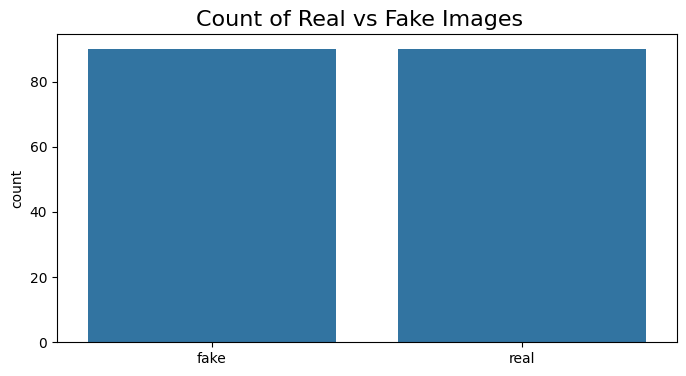

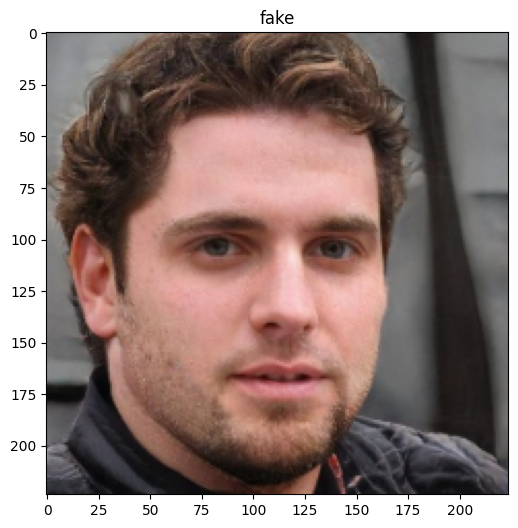

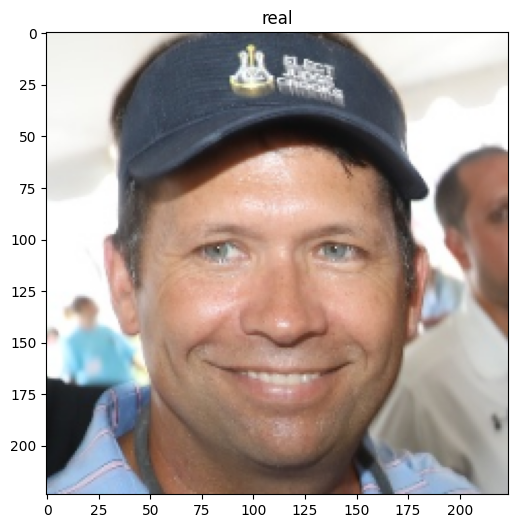

(180, 224, 224, 3)
(120, 224, 224, 3)
(180,)
(120,)


In [30]:
plt.figure(figsize=(8, 4))
plt.title('Count of Real vs Fake Images  ', size=16)
sns.countplot(x=l)
plt.show()

# randomly visualizing images to see whats going on
plt.figure(figsize=(8, 6))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])
plt.show()

X_train = []
X_test = []
y_train = []
y_test = []

# dividing data into train and test sets
for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)



X_train = np.array(X_train)# / 255.0

X_test = np.array(X_test) #/ 255.0


y_train = np.array(y_train)



y_test = np.array(y_test)


y_test = np.array(y_test)
print (X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
     


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [32]:
num_classes = 2
input_shape = (224, 224, 3)
     

In [34]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 80
image_size = 72  
patch_size = 6  
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  
transformer_layers = 8
mlp_head_units = [2048, 1024]  

In [35]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(X_train)

In [36]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [37]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


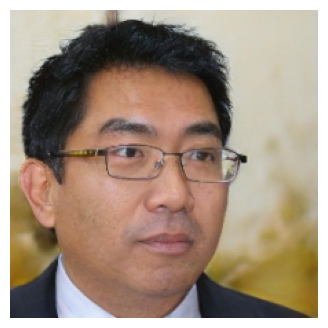

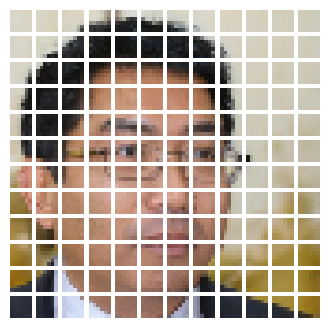

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [39]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [40]:

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    
    augmented = data_augmentation(inputs)
    
    patches = Patches(patch_size)(augmented)
    
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    
    for _ in range(transformer_layers):
    
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
    
        x2 = layers.Add()([attention_output, encoded_patches])
    
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
    
        encoded_patches = layers.Add()([x3, x2])

    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    
    logits = layers.Dense(num_classes)(features)
    
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

vit_classifier = create_vit_classifier()

optimizer = tfa.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)

vit_classifier.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)


history = vit_classifier.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
)





Epoch 1/80
1/1 [==============================] - 30s 30s/step - loss: 1.7345 - accuracy: 0.5123 - top-5-accuracy: 1.0000 - val_loss: 10.8208 - val_accuracy: 0.3889 - val_top-5-accuracy: 1.0000
Epoch 2/80
1/1 [==============================] - 19s 19s/step - loss: 9.1997 - accuracy: 0.5123 - top-5-accuracy: 1.0000 - val_loss: 7.6146 - val_accuracy: 0.6111 - val_top-5-accuracy: 1.0000
Epoch 3/80
1/1 [==============================] - 11s 11s/step - loss: 9.0710 - accuracy: 0.4815 - top-5-accuracy: 1.0000 - val_loss: 1.3333 - val_accuracy: 0.6111 - val_top-5-accuracy: 1.0000
Epoch 4/80
1/1 [==============================] - 9s 9s/step - loss: 1.8518 - accuracy: 0.5988 - top-5-accuracy: 1.0000 - val_loss: 4.1702 - val_accuracy: 0.3889 - val_top-5-accuracy: 1.0000
Epoch 5/80
1/1 [==============================] - 15s 15s/step - loss: 5.5570 - accuracy: 0.5000 - top-5-accuracy: 1.0000 - val_loss: 2.3042 - val_accuracy: 0.4444 - val_top-5-accuracy: 1.0000
Epoch 6/80
1/1 [====================

4/4 [==============================] - 4s 499ms/step
                    precision    recall  f1-score   support

  Healthy(class 0)       0.56      0.40      0.47        60
UnHealthy(class 1)       0.53      0.68      0.60        60

          accuracy                           0.54       120
         macro avg       0.55      0.54      0.53       120
      weighted avg       0.55      0.54      0.53       120

Accuracy:  54.166666666666664


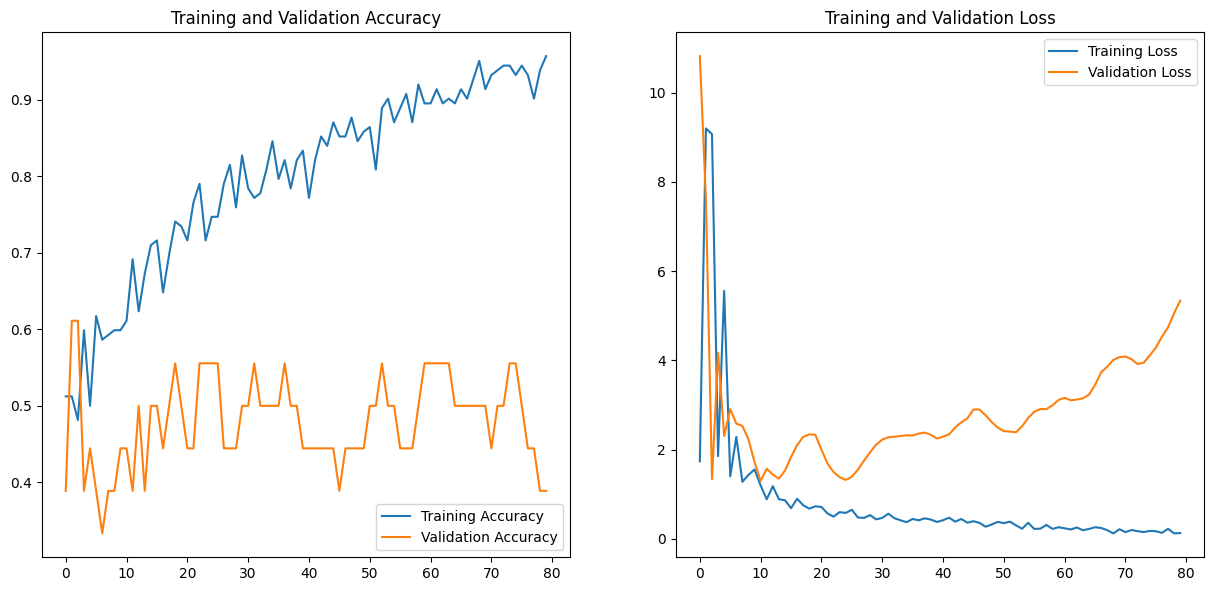

[[0.55813953 0.46753247]
 [0.44186047 0.53246753]]


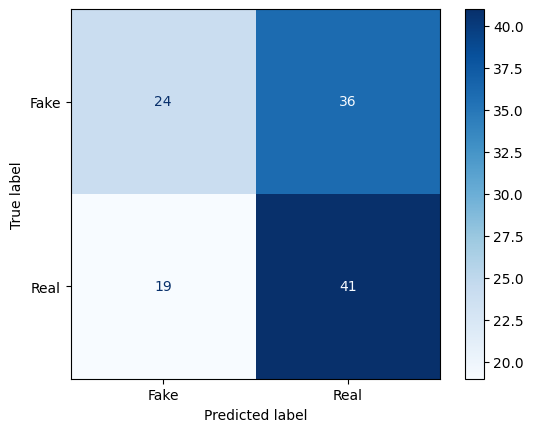

In [42]:
predictions = np.argmax(vit_classifier.predict(X_test), axis=-1)

predictions = predictions.reshape(1, -1)[0]

    
print(classification_report(y_test, predictions, target_names=['Healthy(class 0)', 'UnHealthy(class 1)']))
print("Accuracy: ", metrics.accuracy_score(y_test, predictions) * 100)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(80)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

result = confusion_matrix(y_test, predictions , normalize='pred')
print(result)
labels = ["Fake", "Real"]
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

saving the model

In [43]:
vit_classifier.save(os.path.join('models','mymodel.h5'))


c:\Users\harsh\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
from tensorflow.keras.models import load_model
# new_model = load_model('mymodel.h5')
# new_model.predict(np.expand_dims(resize/255, 0))
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa 
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer, Dense, Embedding
import tensorflow as tf
num_classes = 2
input_shape = (224, 224, 3)    
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 80
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024] 
class Patches(Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Define the PatchEncoder class
class PatchEncoder(Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = Dense(units=projection_dim)
        self.position_embedding = Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded
vit_classifier = load_model(
    r'C:\Users\harsh\OneDrive\Desktop\New folder\Mail\models\mymodel.h5', 
    custom_objects={'Patches': Patches, 'PatchEncoder': PatchEncoder}
)
n=117
print(vit_classifier.predict(X_test))
# print(np.argmax(vit_classifier.predict(X_test[n]), axis=-1))
# print(vit_classifier.predict(X_test).argmax(-1).item)
# plt.imshow(X_test[n])
# print(y_test[n])
print(np.argmax(vit_classifier.predict(X_test), axis=-1))
print(y_test)
img = cv2.imread(r'C:\Users\harsh\OneDrive\Desktop\new BE\fake.jpg')
resize = tf.image.resize(img,(224,224))
print(vit_classifier.predict(np.expand_dims(resize,0)))
print(np.argmax(vit_classifier.predict(np.expand_dims(resize,0))))

img = cv2.imread(r'C:\Users\harsh\OneDrive\Desktop\new BE\fake.jpg')
resize = tf.image.resize(img,(224,224))
print(vit_classifier.predict(np.expand_dims(resize,0)))
print(np.argmax(vit_classifier.predict(np.expand_dims(resize,0))))
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

mymodel = load_model(
    r'C:\Users\harsh\OneDrive\Desktop\New folder\Mail\models\mymodel.h5', 
    custom_objects={'Patches': Patches, 'PatchEncoder': PatchEncoder}
)
img = cv2.imread(r'C:\Users\harsh\OneDrive\Desktop\new BE\fake.jpg')
resize = tf.image.resize(img,(224,224))
print(np.argmax(mymodel.predict(np.expand_dims(resize,0))))

4/4 [==============================] - 3s 492ms/step
[[-2.9190032   5.5457773 ]
 [-2.2989933   2.6593406 ]
 [-3.5820096   5.2619777 ]
 [ 4.8311934  -4.450577  ]
 [-3.397174    7.0149903 ]
 [-2.1699626   2.5814486 ]
 [ 0.22367537 -0.5729126 ]
 [-2.1400235   5.45933   ]
 [-2.046989    3.9269857 ]
 [ 2.5128324  -2.7663167 ]
 [-1.2720681   5.608709  ]
 [ 4.4270396   0.4236565 ]
 [-0.31252736  0.5432395 ]
 [ 0.39777732 -0.4311463 ]
 [-2.1871445   7.921025  ]
 [-2.0121932   6.881147  ]
 [-2.4824164   8.685015  ]
 [ 0.60276186 -0.81401694]
 [ 5.7925105  -4.679353  ]
 [-1.9536932   3.93218   ]
 [-4.6536155   7.1116037 ]
 [ 0.21547785  0.04641828]
 [ 2.3035257  -1.5801148 ]
 [ 2.0483136  -1.7469407 ]
 [ 0.668447   -0.8203469 ]
 [-1.9770224   6.7415786 ]
 [-2.1567883   6.355128  ]
 [-0.688678    0.7162299 ]
 [-0.890231    1.1615709 ]
 [-2.384031    4.449329  ]
 [ 3.7800786  -2.6322732 ]
 [ 8.508275   -1.9077032 ]
 [-1.8033047   2.9307709 ]
 [ 0.13882944  0.12586656]
 [-4.0326715   8.552482  ]
 [